# K-Nearest Neighbours (Classification) Practical

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset=pd.read_csv("qsar-biodeg.csv")
dataset.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2


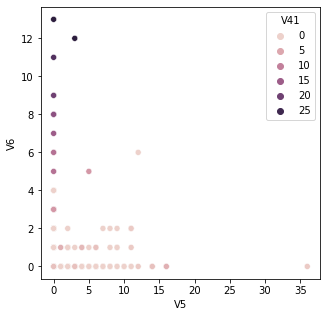

In [3]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="V5",y="V6",data=dataset,hue="V41")
plt.show()

In [4]:
dataset.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
Class    0
dtype: int64

In [5]:
x=dataset.iloc[:,:-1]
y=dataset["V41"]

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
kn.score(x_test,y_test)*100

84.36018957345972

In [12]:
kn.score(x_train,y_train)*100

93.36492890995261

In [13]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Smart\anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


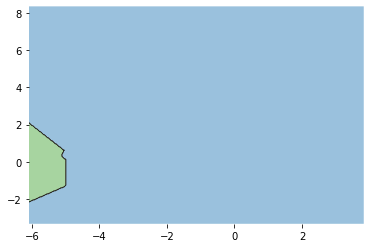

In [17]:
# Provide filler values for features not being plotted
filler_values = np.mean(x_train, axis=0)  # using the mean value of each feature
filler_values_dict = {i: filler_values[i] for i in range(x_train.shape[1]) if i not in [0, 1]}
# Plot decision regions
plot_decision_regions(x_train.to_numpy(), y_train.to_numpy(), clf=kn, filler_feature_values=filler_values_dict, feature_index=[0, 1])
plt.show()
